# Introduction

This lab will provide an introduction to programming concepts in Python. It will start by running a short Python program that loads some crop yield data collected by harvesters and visualises this data on interactive maps and charts. Then, we will see how this program uses a range of Python concepts to complete its tasks. The concepts this lab will cover are:

* data types and structures
* variables and bindings
* control flow, loops, and conditional execution
* classes and objects


## Setup

### Run the labs

You can run the labs locally on your machine or you can use cloud environments provided by Google Colab or Binderhub. **If you're working with Google Colab and Binderhub be aware that your sessions are temporary and you'll need to take care to save, backup, and download your work.**

<a href="https://colab.research.google.com/github/data-analysis-3300-3003/colab/blob/main/lab-1.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<a href="https://mybinder.org/v2/gh/binder-3300-3003/binder/HEAD" target="_blank">
  <img src="https://mybinder.org/badge_logo.svg" alt="Open In Binder"/>
</a>

### Download data

If you need to download the date for this lab, run the following code snippet. 

In [2]:
import os

if "week-1" not in os.listdir(os.getcwd()):
    os.system('wget "https://github.com/data-analysis-3300-3003/data/raw/main/data/week-1.zip"')
    os.system('unzip "week-1.zip"')

### Install packages

If you're working in Google Colab, you'll need to install the required packages that don't come with the colab environment.

In [3]:
if 'google.colab' in str(get_ipython()):
    !pip install geopandas
    !pip install pyarrow
    !pip install mapclassify
    !pip install rasterio

### Import modules

In [4]:
# Import modules
import os
import pandas as pd
import geopandas as gpd
import plotly.express as px
import plotly.io as pio

# setup renderer
if 'google.colab' in str(get_ipython()):
    pio.renderers.default = "colab"
else:
    pio.renderers.default = "jupyterlab"

# A first Python program

Python is a programming language. A Python program is a series of statements which are executed in turn by your computer when the program is run. These statements perform tasks with data such as reading data from files stored on your disk, transforming data using mathematical operations, generating graphical outputs, or communicating with other computers over networks. 

Here, a short Python program is demonstrated that reads in crop yield data collected by a harvester in Western Australia's Wheatbelt, converts the data into a spatial format, and visualises the data on a web map and charts.  

['.DS_Store', '.ipynb_checkpoints', 'canola-yield-df-1.csv', 'canola-yield-df-2.csv', 'canola-yield-df-3.csv']
Loading file canola-yield-df-1.csv into a Pandas DataFrame
Loading file canola-yield-df-2.csv into a Pandas DataFrame
Loading file canola-yield-df-3.csv into a Pandas DataFrame


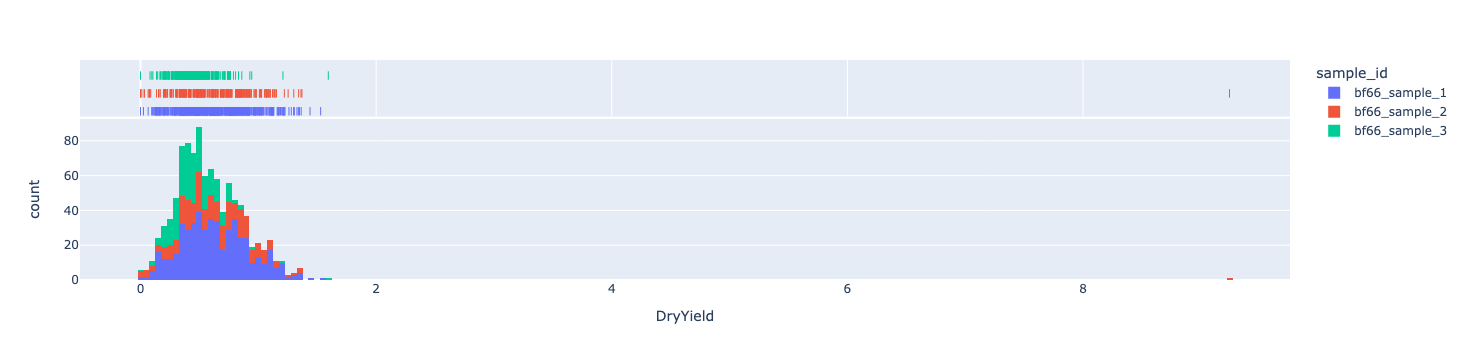

In [9]:
# Import modules
import os
import pandas as pd
import geopandas as gpd
import plotly.express as px

# Load the canola yield data from the harvester
harvester_data_path = os.path.join(os.getcwd(), "week-1")

# Get a list of canola yield data
harvester_data_files = os.listdir(harvester_data_path)

# Check we have a list of csv files
print(harvester_data_files)

# Combine the csv files into one data frame
dfs = []

for i in harvester_data_files:
    if i.endswith(".csv"):
        print(f"Loading file {i} into a Pandas DataFrame")
        tmp_df = pd.read_csv(os.path.join(harvester_data_path, i))
        dfs.append(tmp_df)

df = pd.concat(dfs, axis=0)

# Inspect the yield data format
# Display the first n rows
df.head()

# Transform the yield data to a spatial format
points = gpd.points_from_xy(df["Longitude"], df["Latitude"], crs="EPSG:4326")
gdf = gpd.GeoDataFrame(df, geometry=points)

# Visualise the crop yield data on a web map
basemap = "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"
attribution = "Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community"
gdf.explore(column="DryYield", cmap="plasma", tooltip="DryYield", tiles=basemap, attr=attribution)

# Visualise crop yield data on a chart
gdf_fig = gdf.drop(columns=["geometry"])
fig = px.histogram(gdf_fig, x="DryYield", color="sample_id", marginal="rug")
fig.show()

## How does this program work?

### Programs

* A program is a series of statements that are executed to complete a task.
* Programs complete tasks by loading, transforming, and visualising data.
* Data in programs can be of different types (numeric, text, boolean).
* Data can be combined into data structures to represent complex concepts and objects. 
* Functions operate on data to complete tasks. 

<details>
    <summary><b>Detailed notes on Python programs.</b></summary>

As stated above, a program is a series of statements that are executed to complete a task. The ultimate goal of the program we just ran was to generate visualisations of crop yield data recorded by harvesters. However, to achieve this the program consists of a series of sub-tasks that include reading the harvester data from CSV files on disk, inspecting the data, transforming it to a spatial data structure, and then rendering web maps and charts. 

Our program is loading, transforming, and visualising data. This means our program needs to be able store and represent different types and structures of data. If you look in the display of the `DataFrame` there are numeric, text, and date type data in the columns. Python provides tools for representing different types of data and structures for combining data to represent more complex concepts. For example, the `DataFrame` that is displayed is a data structure well suited to storing tabular data.

In short, a Python program stores data as objects and then uses this data in a range functions that operate on this data to complete tasks. 
    
</details>

<details>
    <summary><b>In a Python program, are data types just used to store observations of scientific variables such as crop yield or temperature?</b></summary>

No. In a Python program built-in data types are used to store a range of information relevant to the execution of a program. This could include "scientific" data such as an array of crop yield values. However, data in a Python program could refer to file paths and directory structures, URLs to websites or data stored in the cloud, or credentials to log in to databases.      
</details>

In this lab we will break down the Python program that generates visualisations of crop yield data recorded by harvesters into its fundamental building blocks, identify how different types of data are represented in Python programs, and demonstrate how we can do things with this data to produce useful outputs. 

### Statements and comments

A Python program consists of statements. **A Python statement is a line of Python code which can be executed by the computer.** 

A comment is a line of text that starts with the `#` symbol. It is not executed by the computer. We can use comments to make notes in our script to help us understand what the program is trying to achieve. 

For example, this code snippet contains two comments and one statement:

```python
# Inspect the yield data format
# Display the first n rows
df.head()
```

### Objects

Everything in a Python program is an object. Built-in scalar data types are the most fundamental building blocks of a Python program. We can use these scalar data types to represent single numbers, words, and sentences. This is where we'll start unpicking this Python program.


## Data types

Python programs perform operations on data to complete tasks. This can be scientific data such as crop yield or temperature measurements or it can be other forms of data necessary for the program to execute such as a file path to where data is stored on disk.

### Built-in data types

Python comes with built-in data types that can be used to store different values. These are sometimes called <a href="https://wesmckinney.com/book/python-basics.html#scalar_types" target="_blank">scalar types</a> as they store single values. 

* `float` - storing floating point numeric values.
* `int` - storing integer numeric values.
* `str` - storing text data as strings.
* `bool` - storing `True` or `False` as boolean values.
* `None` - storing null values.
* `bytes` - storing raw binary data.

#### Numeric data types

`int` and `float` are numeric data types in Python and are used to store integer and floating point values, respectively.

The canola yield data that we have imported is of numeric type with units of tonnes/ha. Let's represent a crop yield measurement of 0.227 tonnes/ha as data in our program and inspect its type.

In [10]:
print(type(0.227))

<class 'float'>


Our yield measurement of 0.227 tonnes/ha has been stored as data object of `float` type. This makes sense as this number has a decimal point. We can also inspect how the crop yield data that was measured by the harvester is stored in our program. The below code snippet extracts the first crop yield measurement and prints its type and value.  

In [11]:
# get the first crop yield value
crop_yield = df.loc[:, "DryYield"].to_list()[0]
print(type(crop_yield))
print(crop_yield)

<class 'float'>
0.227


#### String data types

We also need to represent text data in our programs. In the crop yield dataset the sample id is text. In Python, text data is stored as a `str` type (or string type).

Text data is stored as string types by enclosing the characters in double`"` or single `'` quotes. 

In [12]:
print(type("a string"))
print("a string")

<class 'str'>
a string


Let's check how the sample id names in the canola yield dataset are represented.

In [13]:
# get the first field name value
field_name = df.loc[:, "sample_id"].to_list()[0]
print(type(field_name))
print(field_name)

<class 'str'>
bf66_sample_1


#### Boolean data types

Boolean (`bool`) data types are used for storing `True` or `False` values. In Python, `True` or `False` are Boolean values and not string data types.

Boolean data types are used to store the result of testing a condition that evaluates to true or false. For example, greater than and less than operations evaluate to true or false. We could test if our crop yield value of 0.227 is greater than 0.2 (it is and this expression should evaluate to true).


In [14]:
print(type(0.277 > 0.2))
print(0.227 > 0.2)

<class 'bool'>
True


We can use the `isinstance(value, type)` function to test if a data value matches a data type. Let's test if our crop yield value is numeric or string.

In [21]:
print(isinstance(0.227, float))
print(isinstance(0.227, str))

True
False


### Recap quiz

<details>
    <summary><b>If you execute <code>x = 3.4</code>, what data type will <code>x</code> be?</b></summary>
<code>float</code>
</details>
    
<details>
    <summary><b>Which data type would be most suited to record the number of apples harvested from an orchard?</b></summary>
<code>int</code> -  we should not be able to harvest fractions of apples.
</details>

<details>
    <summary><b>Which data type would we use to record a farm name?</b></summary>
<code>str</code> - assuming the farm name is text data.
</details>

<details>
    <summary><b><code>y = 4 + 5</code> and <code>z = y > 10</code> - what value will <code>z</code> be?</b></summary>
<code>False</code> - <code>y</code> evaluates to 9 which is less than 10. Therefore, <code>z</code> will be <code>False</code> and of <code>bool</code> type.
</details>

## Data structures

Python provides a series of built-in data structures that can be used to group together and store related data. 

* `list` - a variable length collection of objects that can be modified.
* `tuple` - a fixed length collection of objects that cannot be modified.
* `set` - a collection of unique objects.
* `dict` - a collection of objects stored as key:value pairs.

### Lists

Lists in Python:

* can be modified during a program's execution. 
* can store duplicate values.
* are created by placing elements in square brackets `[]`.
* elements of a list are ordered.
* elements of a list can be of different data types.

We could store the sample names in our crop yield data set as a list:

In [22]:
["bf66_sample_1", "bf66_sample_2"]

['bf66_sample_1', 'bf66_sample_2']

Lists allow us to store duplicate values. The following is a valid list.

In [23]:
["bf66_sample_1", "bf66_sample_2", "bf66_sample_2"]

['bf66_sample_1', 'bf66_sample_2', 'bf66_sample_2']

A key feature of lists are that they can be modified in place. This makes lists useful data structures for tasks when the number of objects that we want to store in a collection can change during our program's execution. We can use functions such as `.append()` to add objects to the end of a list.

In [24]:
sample_id_list = ["bf66_sample_1", "bf66_sample_2", "bf66_sample_2"]
sample_id_list.append("bf66_sample_3")
print(sample_id_list)

['bf66_sample_1', 'bf66_sample_2', 'bf66_sample_2', 'bf66_sample_3']


In our Python program above, we took advantage of the fact that lists can be modified in place to loop over the CSV files in a directory, import them in as pandas `DataFrames`, and append the `DataFrames` to the list.

```python
# Combine the csv files into one data frame
dfs = []

for i in harvester_data_files:
    if i.endswith(".csv"):
        print(f"Loading file {i} into a Pandas DataFrame")
        tmp_df = pd.read_csv(os.path.join(harvester_data_path, i))
        dfs.append(tmp_df)
```

Here, we start with an empty list `dfs` denoted by just square brackets `[]`. Then, successively, a new object is added to `dfs` using the `append()` function. We finish with a list storing three pandas `DataFrames`. This demonstrates how we change the length and contents of a list during the execution of a program. We have gone from a list with zero elements to a list a list with three elements. 

This example also demonstrates that we can store any Python object in a list. We can also mix the types of objects stored in lists. The following is a valid list.

In [25]:
[1, 2, "not a number", None]

[1, 2, 'not a number', None]

Lists are ordered collections of data. If you add an element to a list it will be appended to the last position. List items can be accessed by their index location with the first element having index `0`. 

Let's demonstrate this by accessing the elements of the `sample_id_list` we created above.

In [26]:
print(sample_id_list)
print("The first element in sample_id_list is at index 0: ", sample_id_list[0])
print("The second element in sample_id_list is at index 1: ", sample_id_list[1])
print("The third element in sample_id_list is at index 2: ", sample_id_list[2])

['bf66_sample_1', 'bf66_sample_2', 'bf66_sample_2', 'bf66_sample_3']
The first element in sample_id_list is at index 0:  bf66_sample_1
The second element in sample_id_list is at index 1:  bf66_sample_2
The third element in sample_id_list is at index 2:  bf66_sample_2


### Tuples

Tuple in Python:

* elements are unchangeable (immutable).
* tuple elements are ordered.
* stores a fixed-length number of elements. 
* created by placing Python objects inside parentheses `()`

In [27]:
(116.804075, -33.889203)

(116.804075, -33.889203)

Here, we have created a tuple with two numeric objects. Similar to lists we can access tuple elements by their index locations.

In [28]:
print("First tuple element: ", (116.804075, -33.889203)[0])

First tuple element:  116.804075


In [29]:
print("Second tuple element: ", (116.804075, -33.889203)[1])

Second tuple element:  -33.889203


As tuples are fixed-length and unchangeable, we cannot append elements to them in the same way we could with lists. This makes them useful data structures for storing data values which we don't want to change. For example, coorindate pairs that describe a location's x and y values (e.g. longitude and latitude) have two elements. Therefore, a tuple could be a suitable data format to store coordinate pairs.

The shape of pandas `DataFrames` is also a tuple. A `DataFrame` has two dimensions: number of rows and number of columns. Thus, a tuple is a sensible data structure for storing the shape of `DataFrame` objects. 

In [30]:
df.shape

(1000, 10)

To demonstrate that we cannot change tuple values, let's try and update the number of rows in the tuple storing the shape of `df`.

In [31]:
df.shape[0] = 5

TypeError: 'tuple' object does not support item assignment

We have returned a `TypeError` informing us the tuple objects do not support item assigment (adding new items to the tuple).

Similar to lists, elements of a tuple are ordered and can be duplicated.

### Sets

Set in Python:

* unordered collection objects.
* set elements cannot be duplicated. 
* sets are immutable.
* sets are created by placing elements inside curly brackets `{}`.

Let's create a set and demonstrate that it cannot store duplicate values.

In [32]:
{"bf66_sample_1", "bf66_sample_2", "bf66_sample_2", "bf66_sample_3"}

{'bf66_sample_1', 'bf66_sample_2', 'bf66_sample_3'}

In [33]:
{1, 2, 3, 3, 4}

{1, 2, 3, 4}

As sets are not ordered, we cannot access their elements by numeric index locations.

In [34]:
# This fails as set objects are not subscriptable
{"bf66_sample_1", "bf66_sample_2", "bf66_sample_3"}[0]

<>:2: SyntaxWarning:

'set' object is not subscriptable; perhaps you missed a comma?

<>:2: SyntaxWarning:

'set' object is not subscriptable; perhaps you missed a comma?

/tmp/ipykernel_1677/999854995.py:2: SyntaxWarning:

'set' object is not subscriptable; perhaps you missed a comma?

/tmp/ipykernel_1677/999854995.py:2: SyntaxWarning:

'set' object is not subscriptable; perhaps you missed a comma?

/tmp/ipykernel_1677/999854995.py:2: SyntaxWarning:

'set' object is not subscriptable; perhaps you missed a comma?



TypeError: 'set' object is not subscriptable

We can access set elements by looping over them or checking if a value is in the set.

In [35]:
for i in {"bf66_sample_1", "bf66_sample_2", "bf66_sample_3"}:
    print(i)

bf66_sample_1
bf66_sample_2
bf66_sample_3


In [36]:
print("Checking if 'bf66_sample_1' is in the set:")
print("bf66_sample_1" in {"bf66_sample_1", "bf66_sample_2", "bf66_sample_3"})

Checking if 'bf66_sample_1' is in the set:
True


Similar to tuples, sets are unchangeable (immutable). Once created, we cannot change the set's values in our programs.

### Dictionary objects

Dictionary objects, or `dict` objects:

* store data as a collection of key:value pairs. 
* Dictionary objects can be changed and modified. 
* Dictionary object elements are ordered. 
* We can access dictionary elements by their key. 
* Dictionary objects are created by placing key:value pairs inside curly brackets `{}`.
* Keys of a dictionary object cannot be duplicated.
* Elements (values) of dictionary objects can be of a different type.
* Values can be of different lengths.

#### Using Dictionary objects to represent tabular data

Tabular data has data values stored in rows and columns. Generally, a column corresponds to a particular variable or type of data and rows correspond to observed or measured values. We can use dictionary objects to represent tabular data in Python.

For example, we can use the key:value pair pattern to represent a column header and column values.

```python
"Elevation(m)": [213, 222, 214, 254]
```

Here, we've used a string object to represent the column header (the key) and a list object to represent column values (the value). Combining one or more key:value pairs in a dictionary object is a way of representing tabular data in Python. 

```python
{
"Elevation(m)": [213, 222, 214, 254],
"Date": ["20/11/2017", "20/11/2017", "20/11/2017", "19/11/2017"],
"sample_id": ["bf66_sample_1", "bf66_sample_1", "bf66_sample_2", "bf66_sample_3"]
}

```

Let's create this dictionary object.

In [37]:
{
"Elevation(m)": [213, 222, 214, 254],
"Date": ["20/11/2017", "20/11/2017", "20/11/2017", "19/11/2017"],
"sample_id": ["bf66_sample_1", "bf66_sample_1", "bf66_sample_2", "bf66_sample_3"]
}

{'Elevation(m)': [213, 222, 214, 254],
 'Date': ['20/11/2017', '20/11/2017', '20/11/2017', '19/11/2017'],
 'sample_id': ['bf66_sample_1',
  'bf66_sample_1',
  'bf66_sample_2',
  'bf66_sample_3']}

Keys of dictionary objects cannot be duplicated. For example:

In [38]:
{
"Elevation(m)": [213, 222, 214, 254],
"Date": ["20/11/2017", "20/11/2017", "20/11/2017", "19/11/2017"],
"sample_id": ["bf66_sample_1", "bf66_sample_1", "bf66_sample_2", "bf66_sample_3"],
"sample_id": ["bf66_sample_1", "bf66_sample_1", "bf66_sample_2", "bf66_sample_3"]
}

{'Elevation(m)': [213, 222, 214, 254],
 'Date': ['20/11/2017', '20/11/2017', '20/11/2017', '19/11/2017'],
 'sample_id': ['bf66_sample_1',
  'bf66_sample_1',
  'bf66_sample_2',
  'bf66_sample_3']}

To access elements of a dictionary object we can refer to its key. The following code snippet extracts a list of dates from the dictionary object.

In [39]:
demo_dict = {"Elevation(m)": [213, 222, 214, 254],
    "Date": ["20/11/2017", "20/11/2017", "20/11/2017", "19/11/2017"],
    "sample_id": ["bf66_sample_1", "bf66_sample_1", "bf66_sample_2", "bf66_sample_3"]}
dates = demo_dict["Date"]
dates

['20/11/2017', '20/11/2017', '20/11/2017', '19/11/2017']

Dictionary objects have a `get()` function that we can use to extract elements.

In [40]:
dates = demo_dict.get("Date")
dates

['20/11/2017', '20/11/2017', '20/11/2017', '19/11/2017']

Dictionary objects also have a `keys()` function that returns a list of keys. 

In [41]:
demo_dict.keys()

dict_keys(['Elevation(m)', 'Date', 'sample_id'])

There is also a `values()` function that we can use to return a list of values. 

In [42]:
demo_dict.values()

dict_values([[213, 222, 214, 254], ['20/11/2017', '20/11/2017', '20/11/2017', '19/11/2017'], ['bf66_sample_1', 'bf66_sample_1', 'bf66_sample_2', 'bf66_sample_3']])

And, the `items()` function returns a tuple of key-value pairs. 

In [43]:
demo_dict.items()

dict_items([('Elevation(m)', [213, 222, 214, 254]), ('Date', ['20/11/2017', '20/11/2017', '20/11/2017', '19/11/2017']), ('sample_id', ['bf66_sample_1', 'bf66_sample_1', 'bf66_sample_2', 'bf66_sample_3'])])

We can add elements to a dictionary object by providing a new key with corresponding values.

In [44]:
demo_dict["yield"] = [1.45, 2.5, 3, 2.8, 5.5]
demo_dict

{'Elevation(m)': [213, 222, 214, 254],
 'Date': ['20/11/2017', '20/11/2017', '20/11/2017', '19/11/2017'],
 'sample_id': ['bf66_sample_1',
  'bf66_sample_1',
  'bf66_sample_2',
  'bf66_sample_3'],
 'yield': [1.45, 2.5, 3, 2.8, 5.5]}

You will notice that the list of yield values we just added to the dictionary has a different number of elements to the other elements in the values slots.  

### Recap quiz

<details>
    <summary><code>x = [1, 2, 3, 4]</code> - what data structure is <code>x</code>?</summary>
List
</details>

<details>
    <summary><code>q = {1, 2, 3, 4}</code> - what data structure is <code>q</code>?</summary>
Set
</details>

<details>
    <summary>Which data structure organises its elements using key:value pairs?</summary>
Dictionary objects
</details>

<details>
    <summary>Are lists immutable data structures?</summary>
No, we can modify the values of a list and change its size (number of elements) during the program's execution.
</details>

Edit the following code snippet to retrieve and print the 3rd element in `x`.

In [48]:
x = [1, 2, 3, 4]
# add code here #

<details>
    <summary><b>answer</b></summary>
<code>print(x[2])</code>
</details>

Edit the following code snippet to retrieve and print the first element in `z`.

In [50]:
z = (4, 5)
# add code here #

<details>
    <summary><b>answer</b></summary>
<code>print(z[0])</code>
</details>

What is the data type of the value associated with the `field` key in the dict `q`? Retrieve this value from the dict and print its type. 

In [53]:
q = {
"name": "farm 1",
"field": 439,
"crop": "canola"
}
# add code here #

<details>
    <summary><b>answer</b></summary>
<code>print(type(z["field"]))</code>
</details>

## Variables

In the program to read in and visualise crop yield data, you will have noticed this syntax pattern: `variable_name = data`. 

```
basemap = "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"
```

`=` is the assignment operator (not equals) which is assigning (or binding) the `variable_name` to the `data` object. 

The statement `basemap = "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"` is assigning the name `basemap` to the data `"https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"`. The data is string which is storing the URL for a satellite imagery basemap. 

Let's see what the data looks like.

In [42]:
print("https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}")

https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}


Now, let's assign the name `basemap` to the data object storing string URL.

In [43]:
basemap = "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"
print(basemap)

https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}


Calling `print()` on the variable name returns the data object that the variable name refers to.

We can assign variable names to any Python objects. When the variable name is used in a Python statement, the data value which the variable points to is used in the operations. 

In [44]:
x = 1
y = 2
z = x + y
print(z)

3


Variables make a program's code easier to organise, write, and understand. We could have performed the above addition operation by just writing `1 + 2`. However, this doesn't provide us with a way to capture the result of that operation and use it again in our program without re-running `1 + 2`. 

Variables provide us with a mechanism by which we retrieve and use data objects (that are stored in the computer's memory) at various places in our program. A variable name points to the location in the computer's memory where a data object is stored.  

While using the result of `1 + 2` is a trivial example, there are many cases where using variables is important. This statement reads a CSV file into our Python program: `tmp_df = pd.read_csv(os.path.join(harvester_data_path, i))`. To access the data stored in the CSV file we can use variable name `tmp_df` which points to where the data in the CSV file was loaded into memory. We don't need to read the CSV file from disk each time we want to access its data. 

Let's make these concepts concrete. 

When we assign the variable name `basemap` to the string `"https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"`, the variable name is a pointer to the string's data object. 

![](https://github.com/data-analysis-3300-3003/figs/raw/main/week-1-variable.jpg)

If we create another variable called `basemap_1` and assign it to `basemap`, both variables will point to the same data object (the string URL).

![](https://github.com/data-analysis-3300-3003/figs/raw/main/week-1-variable-1.jpg)

Let's check this. 

In [45]:
basemap_1 = basemap
print(basemap_1)

https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}


If we assign `basemap` to a new data object, `basemap_1` will still point to the original string data.

![](https://github.com/data-analysis-3300-3003/figs/raw/main/week-1-variable-2.jpg)

In [46]:
basemap = [1, 2, 3, 4, 5]
print(basemap)
print(basemap_1)

[1, 2, 3, 4, 5]
https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}


If we assign `basemap_1` to a new data object the string data for URL will no longer be accessible in our program and will eventually be removed from the computer's memory. 

### Variable names

There are rules that need to be followed when creating variable names:

* variable names can only be text letters (A-Z, a-z), numbers (0-9), or underscores (_)
* variable names cannot begin with a number
* variable names cannot include whitespace
* variable names cannot be reserved keywords such True, False, if

There are also some conventions that can be followed to help write programs that are easy to follow: 

* use a consistent style for writing variable names - snake_case where words are separated by underscores is recommended by the PEP8 style guide for Python code
* use a descriptive variable name so it helps you understand what kind of data it is referring to

## Control flow

So far we have demonstrated how we can represent information and concepts in our program as different data types and using different data structures. However, we are not using our program as a data storage device. We are using it to complete tasks with this data. Control flow refers to the sequence of steps that our program takes from start to finish when it is run. 

The most simple form of control flow is executing statements from top to bottom as they are written in your script.

In [54]:
print("this statement is executed first")
print("and this statement is executed second")

this statement is executed first
and this statement is executed second


### Loops

Loops use a `for` statement that allows us to iterate over items in a sequence. For example, if `x` is a list `[1, 2, 3]` then:

```
for i in x:
    print(i)
```

will print the values of 1, 2, and 3 in turn for each iteration of the loop, `i`, takes on the value of the corresponding element in `x`.

For loops are useful if we want to iterate over (repeat) a block of statements using different values from a sequence of items in turn. If we wanted to add 10 to each element of `x` we could write a for loop as:

```
for i in x:
    print(i + 10)
```

Let's demonstrate this.

In [55]:
x = [1, 2, 3]

for i in x:
    print(i + 10)

11
12
13


**It is important to note that the statements inside the for loop must be indented.**

Let's refer back to our program to read in crop yield data and see a use of for loops.

```python
# Combine the csv files into one data frame
dfs = []

for i in harvester_data_files:
    if i.endswith(".csv"):
        print(f"Loading file {i} into a Pandas DataFrame")
        tmp_df = pd.read_csv(os.path.join(harvester_data_path, i))
        dfs.append(tmp_df)
```

Here, the for loop is iterating over a list of file paths to CSV files storing crop yield data. For each of the CSV files in the list, the data is read into a variable `tmp_df` in turn, and, then appended to the list `dfs`. This is an example of how we can loop over a series of files in a folder on our computer and read their data into our Python program. 

Let's modify the for loop to illustrate this.

In [56]:
# Load the canola yield data from the harvester
harvester_data_path = os.path.join(os.getcwd(), "week-1")

# Get a list of canola yield data
harvester_data_files = os.listdir(harvester_data_path)

# Check we have a list of csv files
print(harvester_data_files)

# loop over elements in harvester_data_files
# i takes on the value of a path to a csv file
for i in harvester_data_files: 
    if i.endswith(".csv"):
        print(" ")
        print("**********************************************************")
        print(f"We are currently loading file {i} into a Pandas DataFrame")
        tmp_df = pd.read_csv(os.path.join(harvester_data_path, i))
        print(tmp_df.head())
        dfs.append(tmp_df)

print(" ")
print(f"We have a list of {len(dfs)} Pandas DataFrames read from csv files")   

['.DS_Store', '.ipynb_checkpoints', 'canola-yield-df-1.csv', 'canola-yield-df-2.csv', 'canola-yield-df-3.csv']
 
**********************************************************
We are currently loading file canola-yield-df-1.csv into a Pandas DataFrame
    Latitude   Longitude  DryYield  Crop             Time  Heading   Variety  \
0 -31.606760  117.497719     0.227     5  11/11/2020 8:01    242.7  43Y23 RR   
1 -31.605409  117.496881     0.372     5  11/11/2020 8:02    344.3  43Y23 RR   
2 -31.603557  117.496855     0.651     5  11/11/2020 8:04    359.9  43Y23 RR   
3 -31.601549  117.496855     0.923     5  11/11/2020 8:05    359.8  43Y23 RR   
4 -31.599818  117.496855     1.216     5  11/11/2020 8:06    360.0  43Y23 RR   

   Elevation      sample_id  
0     264.32  bf66_sample_1  
1     265.39  bf66_sample_1  
2     262.40  bf66_sample_1  
3     264.61  bf66_sample_1  
4     267.51  bf66_sample_1  
 
**********************************************************
We are currently loading file 

### Conditional execution

Conditional execution is a form of control flow that allows for branches in the sequence that statements are executed. A boolean condition is tested, and, `if` it evaluates to `True` then one set of statements are executed and `if` it evaluates to `False` a different set of statements are executed. 

Conditions are tested within `if` blocks:

```python
if True:
    these statements are executed
else:
    these statements are executed
```

A simple example:

```python
x = 11

if x >= 10:
    print("x is greater than or equal to 10")

```

In this instance, the statements inside the `if` block will be executed as `x` is 11 and so greater than 10.

However, if we change the value of x to 9 the statements inside the `if` block will not be executed. 

```python
x = 9

if x >= 10:
    print("x is greater than or equal to 10")

```

In [57]:
x = 11

if x >= 10:
    print("x is greater than or equal to 10")

x is greater than or equal to 10


In [58]:
# nothing should be printed
x = 9

if x >= 10:
    print("x is greater than or equal to 10")

**Similar to for loops, the statements inside the `if` block should be indented.**

We can use `else` blocks for statements that can be executed if the `if` statement evaluates to `False`.

```python
x = 9

if x >= 10:
    print("x is greater than or equal to 10")
else:
    print("x is less than 10")
```

In [59]:
x = 9

if x >= 10:
    print("x is greater than or equal to 10")
else:
    print("x is less than 10")

x is less than 10


There are many uses for `if` statements in Python programs. An `if` statement was used when we read in CSV files of harvester data.

```python
# Combine the csv files into one data frame
dfs = []

for i in harvester_data_files:
    if i.endswith(".csv"):
        print(f"Loading file {i} into a Pandas DataFrame")
        tmp_df = pd.read_csv(os.path.join(harvester_data_path, i))
        dfs.append(tmp_df)
```

Here, the `if` statement is being used to check the file path is referring to a CSV file. Only if this is `True` does our program try to read the file into a pandas `DataFrame`.

### Recap quiz

Write a for loop to subtract 3 from every element in a tuple `s` and print the result?

In [66]:
s = (1, 2, 3)
# add code here #

<details>
    <summary><b>answer</b></summary>
<code>for i in s: print(i - 3)</code>
</details>

<details>
    <summary><b>How would you iterate over list of file paths?</b></summary>
Using a for loop.
</details>

Write a for loop to subtract 3 from every element in the tuple `s` and append the result to a list `q`?

In [67]:
q = []
s = (1, 2, 3)
# add code here #

<details>
    <summary><b>answer</b></summary>
<code>for i in s: q.append(i - 3)</code>
<code>print(q)</code>
</details>

Write a loop to subtract 3 from every element in the tuple `s` and append the result to a list `q` if the result is less than 0?

In [68]:
q = []
s = (1, 2, 3)
# add code here #

<details>
    <summary><b>answer</b></summary>
<code>for i in s:
    if i -3 < 0:
        q.append(i - 3)
print(q)
</code>
</details>

## Classes and Objects

We have mentioned a few times that Python programs comprise objects. We will now define what an object is and how the concept of an object relates to the data types and structures we have looked at above.

An object is a more general concept in programming. An object in a computer program has:

* properties or attributes (data)
* behaviour (methods or functions that do things object data). 

Objects provide a way to add structure to a program by combining related data and behaviours. 

Alongside the built-in data types and structures, we can create objects that are customised and useful for specific tasks or representing specific kinds of data. Often, custom data types will combine the built-in data types and structures, or other custom objects, to create objects that represent more complex concepts.

### Classes

A **class** is a definition of a custom object. The class defines the object's data and methods. An object's data (sometimes called its properties or attributes) can be built-in Python data types or structures or custom classes. An object's methods are functions that can be used to transform data or implement other behaviour that is relevant to the object. 

This is a very basic class definition for a table object to handle tabular data. For the classes data we can use a dictionary object. A simple class for a table could also have a method that returns a list of the column headers to the user.

```python
class Table:
    
    # Properties
    # data is dictionary object with key:value pairs for each column
    def __init__(self, data):
        self.data = data
        
    # Methods
    def get_column_headers(self):
        column_headers = self.data.keys()
        
        return column_headers

```

However, for most use cases there are existing classes that have already been developed and can be used in our programs. Keeping with the idea of working with tabular data, pandas provides a `DataFrame` class to work with tabular data. In our Python program to visualise the crop yield data we read the tabular data stored in CSV files into pandas `DataFrames`.

You can inspect the class definition for a pandas `DataFrame` by executing (maybe do this at the end of the notebook or in a new notebook as it's a long and detailed class definition):  

```python
import pandas as pd

help(pd.DataFrame)
```

A pandas `DataFrame` is a far more comprehensive class for handling tabular data. Compared to our small example of using a dictionary object to store tabular data, a pandas `DataFrame` implements well defined data structures for storing tabular data and provides a suite of useful methods (functions) for analysing and processing tabular data. 

This is a snippet of the class definition for a pandas `DataFrame`'s properties (i.e. the tabular data stored in the object). 

```
Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index.
 |  
 |      .. versionchanged:: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided.
 |  columns : Index or array-like
 |      Column labels to use for resulting frame when data does not have them,
 |      defaulting to RangeIndex(0, 1, 2, ..., n). If data contains column labels,
 |      will perform column selection instead.
 |  dtype : dtype, default None
 |      Data type to force. Only a single dtype is allowed. If None, infer.
 |  
 |      .. versionchanged:: 1.3.0
```

We can see the class `DataFrame` is a data structure for "Two-dimensional, size-mutable, potentially heterogeneous tabular data". It has the following properties:

* data - the tabular data stored in the data frame (generated from dictionary data)
* index - the row index (row labels)
* columns - the column headers
* dtype - the data types of each column

![](https://github.com/data-analysis-3300-3003/figs/raw/main/week-1-pandas-data-frame.jpg)

A pandas `DataFrame` stores its values in rows and columns. There is a list of column headers (which should provide a helpful description of what kind of data is in each column) and a row index.

The pandas `DataFrame` object stores a range of properties that are useful for working with tabular data. You can look up the documentation for a `DataFrame` <a href="https://pandas.pydata.org/docs/reference/frame.html" target="_blank">here</a>. The properties listed **do not** have parentheses after their name `()`. Let's look at the properties under *attributes and underlying data*. We can see the `DataFrame` has a `values` property which is the actual data values in the table and a `shape` property which tells us the shape of the table (number of rows and columns).

![](https://github.com/data-analysis-3300-3003/figs/raw/main/week-1-pandas-docs-labelled.jpg)

Most of the time we will not look up class definitions as Python code (as in the snippet above) but explore classes using their documentation websites. Let's read a CSV file into a pandas `DataFrame` and explore its properties.

In [53]:
# Load the canola yield data from the harvester
harvester_data_path = os.path.join(os.getcwd(), "week-1", "canola-yield-df-1.csv")

df = pd.read_csv(harvester_data_path)

# check that df is a DataFrame
type(df)

pandas.core.frame.DataFrame

In [54]:
# Get the shape property of the DataFrame
df.shape

(500, 9)

A tuple data structure is used to store the `shape` property of a `DataFrame`.

In [55]:
# Get the values of the DataFrame
df.values

array([[-31.60675982, 117.4977191, 0.227, ..., '43Y23 RR', 264.32,
        'bf66_sample_1'],
       [-31.60540873, 117.4968805, 0.372, ..., '43Y23 RR', 265.39,
        'bf66_sample_1'],
       [-31.60355699, 117.4968552, 0.651, ..., '43Y23 RR', 262.4,
        'bf66_sample_1'],
       ...,
       [-31.60688574, 117.493947, 0.476, ..., '43Y23 RR', 271.19,
        'bf66_sample_1'],
       [-31.60480349, 117.493947, 0.392, ..., '43Y23 RR', 269.8,
        'bf66_sample_1'],
       [-31.60238646, 117.4939473, 0.649, ..., '43Y23 RR', 264.1,
        'bf66_sample_1']], dtype=object)

However, a `DataFrame` is more than just an object for storing data. It is also where we can find a wide range of tools for working with tabular data - the class methods. Go back to the documentation for a `DataFrame` <a href="https://pandas.pydata.org/docs/reference/frame.html" target="_blank">here</a>. The `DataFrame` methods are indicated by the parentheses after their name `()`. 

There are methods to help us inspect the `DataFrame` values. The `info()` method prints a concise summary table of the `DataFrame`, there a range of methods for performing mathemtatical <a href="https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats" target="_blank">computations / descriptive stats</a>, and methods for <a href="https://pandas.pydata.org/docs/reference/frame.html#serialization-io-conversion" target="_blank">reading data on disk</a> into `DataFrame`s.

Let's explore how we can use some of these methods to work with tabular data in `DataFrames`. 

The `DataFrame` referenced by `df` has an `info()` method. Let's use it. 

In [56]:
# Load the canola yield data from the harvester
harvester_data_path = os.path.join(os.getcwd(), "week-1", "canola-yield-df-1.csv")

df = pd.read_csv(harvester_data_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   500 non-null    float64
 1   Longitude  500 non-null    float64
 2   DryYield   500 non-null    float64
 3   Crop       500 non-null    int64  
 4   Time       500 non-null    object 
 5   Heading    500 non-null    float64
 6   Variety    500 non-null    object 
 7   Elevation  500 non-null    float64
 8   sample_id  500 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


The `info()` method has printed out a summary of the `DataFrame` for us. A `DataFrame` also has a `mean()` method to quickly compute the average of values in a column. 

In [57]:
df.mean(numeric_only=True)

Latitude     -31.598355
Longitude    117.496685
DryYield       0.634416
Crop           5.000000
Heading      174.047400
Elevation    265.177260
dtype: float64

You will notice that we passed `numeric_only=True` when using the `mean()` method. Head the the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html#pandas.DataFrame.mean" target="_blank">mean()</a> documentation to see what this does.

### Instances

Above we said that a class is a definition of an object. The class never has any data stored in it or executes any of its methods - it's just a template for a particular type of object. Objects are **instances** of a class.

When we executed the statement `df = pd.read_csv("csv_file.csv")` we are creating an instance object of the `DataFrame` class which is stored in the computer's memory. 

### Dot notation

We use the `.` operator to access properties and methods of class. For example to access the `shape` property of a `DataFrame` we write `df.shape` and to access the `info()` method we write `df.info()`.

## Modules

There is one final concept to cover that is used in our program to read and visualise harvester yield data. The very first lines of the program.

```python
# Import modules
import os
import pandas as pd
import geopandas as gpd
import plotly.express as px
```

Here, we are importing modules into our script.  A module is a Python file (a file with a `.py` ending) that contains class definitions and functions. When we import a module into our program we can use the classes defined in the module.

For example, we have used the method `os.path.join()` from the os module in our program. This function takes string data describing parts of a file path and joins them together to create path to a directory or file. 

In [58]:
harvester_data_path = os.path.join(os.getcwd(), "data", "week-1", "canola-yield-df-1.csv")
print(harvester_data_path)

/home/jovyan/work/data/week-1/canola-yield-df-1.csv


Inside the `os.path.join()` function you will see that we use the `os.getcwd()` method from the os module. This returns the current working directory.

In [59]:
os.getcwd()

'/home/jovyan/work'

You will see that we imported pandas as `pd`. This means we can refer to pandas as `pd` in our script. For example, to access the `read_csv()` function we write `pd.read_csv()` and not `pandas.read_csv()`. This is just a convenience to make the script less cluttered. The following would also be valid.

```python
import pandas
df = pandas.read_csv("file.csv")
```